In [1]:
# Imports
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loading import demographics, weather, rats, geography

data_folder_path = "C:/Users/jerom/OneDrive/Documents/Uni/MGI/RS and GIS integration/ACT Python Environment/Data/"

rat_df = rats.load_rm_data(data_folder_path + "Rat_Monitor_export.xlsx")
cbs_df = demographics.load_cbs_data(data_folder_path + "cbs_pc4_2024_v1.gpkg")

pc_rat_df = rats.group_by_postcode(rat_df)
month_rat_df = rats.group_by_month(rat_df)



## Seasonality

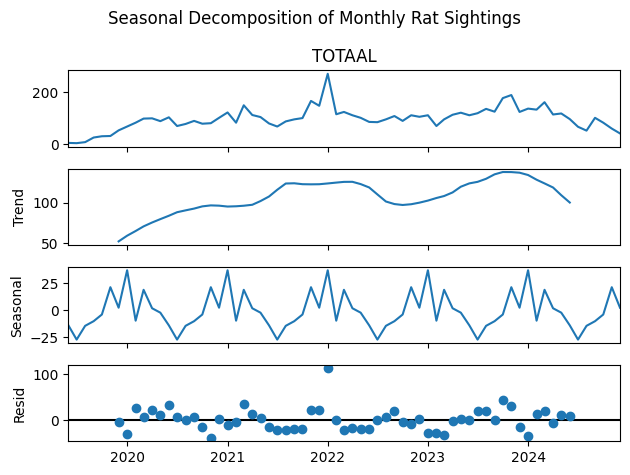

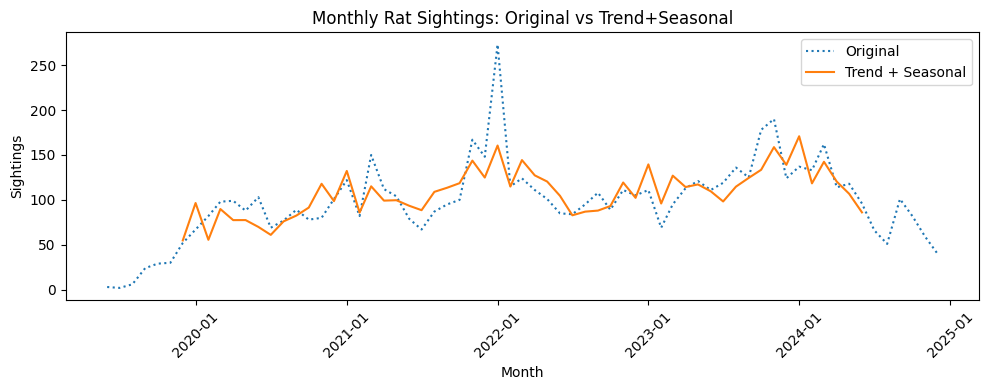

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure your time series is indexed by date
ts = month_rat_df.set_index('date')['TOTAAL']

# Decompose (assume monthly frequency)
result = seasonal_decompose(ts, model='additive')

# Plot decomposition
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Rat Sightings')
plt.tight_layout()
plt.show()

# Plot original and trend+seasonal with months on x-axis
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(ts.index, ts.values, linestyle=':', label='Original')
plt.plot(ts.index, result.trend + result.seasonal, label='Trend + Seasonal')
ax.set_xlabel('Month')
ax.set_ylabel('Sightings')
ax.set_title('Monthly Rat Sightings: Original vs Trend+Seasonal')
ax.legend()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


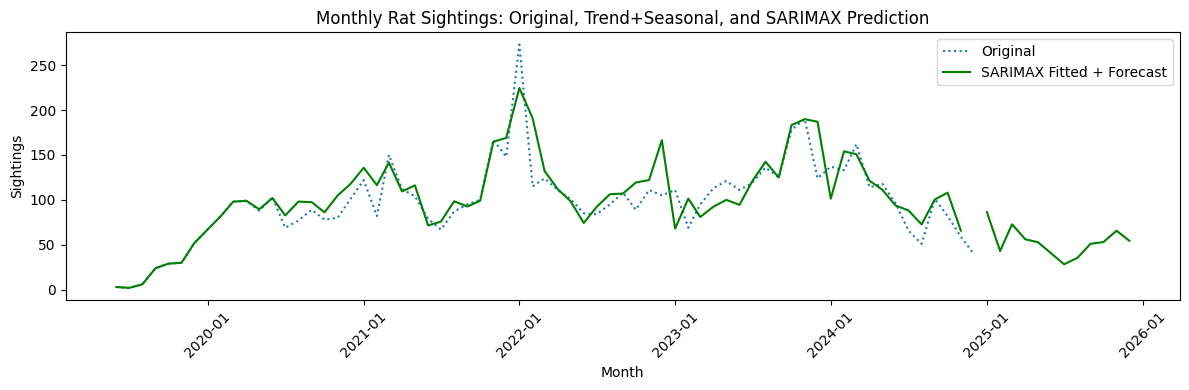

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
model_results = model.fit()

# Get fitted values
fitted = model_results.fittedvalues
fitted = fitted.shift(-1)

# Get forecast (future)
forecast = model_results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean

# Concatenate fitted and forecast
full_pred = pd.concat([fitted, forecast_values])

fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(ts.index, ts.values, linestyle=':', label='Original')
#plt.plot(ts.index, result.trend + result.seasonal, label='Trend + Seasonal')
plt.plot(full_pred.index, full_pred.values, label='SARIMAX Fitted + Forecast', color='green')
ax.set_xlabel('Month')
ax.set_ylabel('Sightings')
ax.set_title('Monthly Rat Sightings: Original, Trend+Seasonal, and SARIMAX Prediction')
ax.legend()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Postcode

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE: 2.10, MAE: 1.68, R2: -0.28


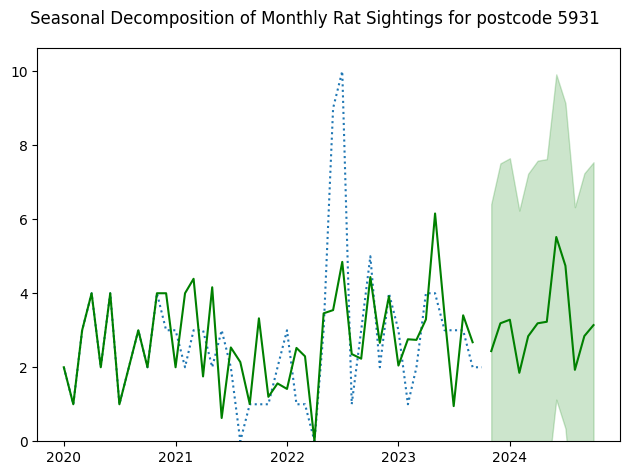

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RMSE: 2.63, MAE: 2.07, R2: -0.56


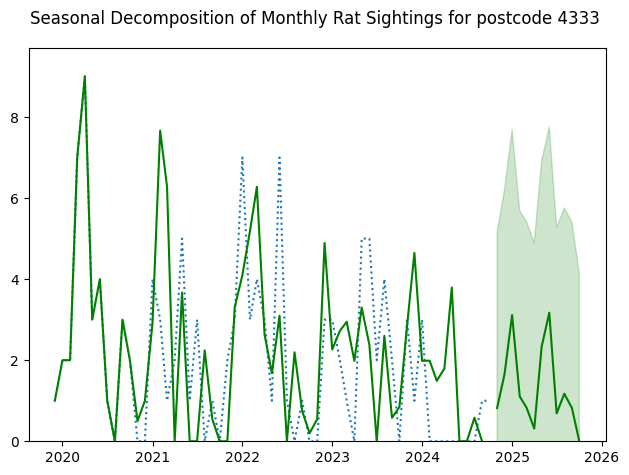

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RMSE: 2.31, MAE: 1.73, R2: -0.92


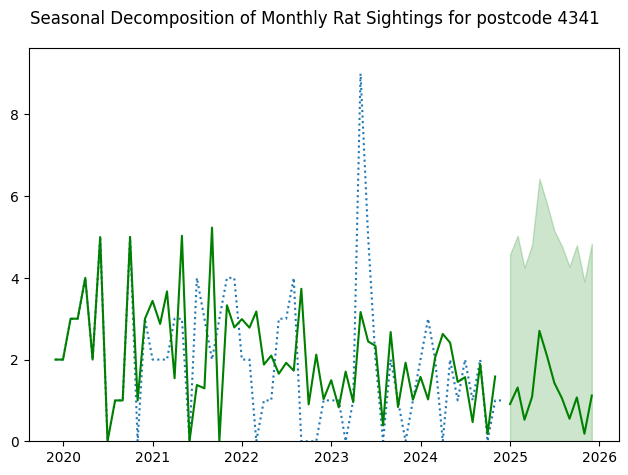

RMSE: 9.11, MAE: 3.62, R2: -0.46


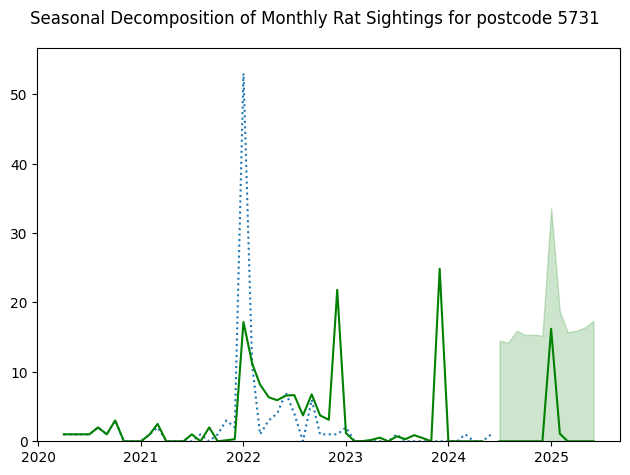

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RMSE: 2.41, MAE: 1.99, R2: -0.84


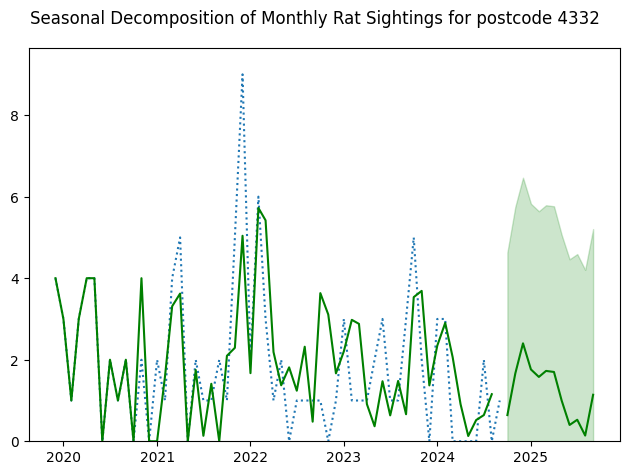

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RMSE: 1.80, MAE: 1.26, R2: -0.56


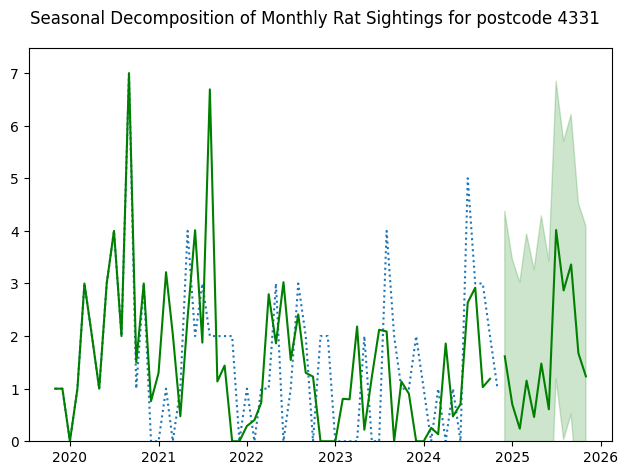

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 1.90, MAE: 1.33, R2: 0.30


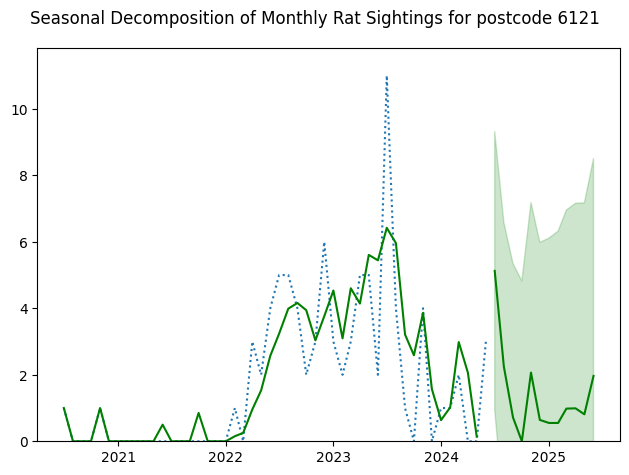

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RMSE: 2.71, MAE: 1.76, R2: -1.06


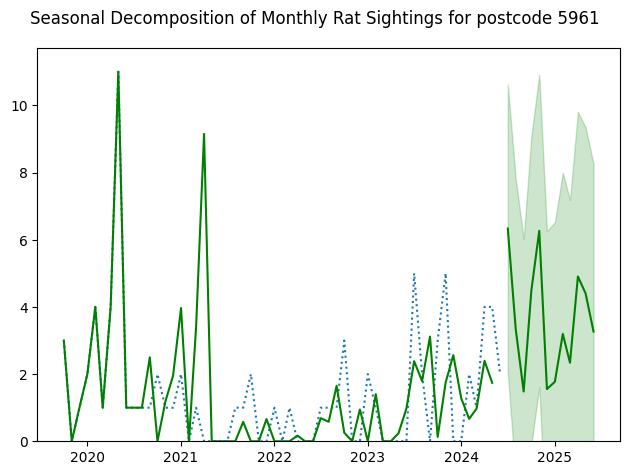

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RMSE: 2.20, MAE: 1.70, R2: -0.95


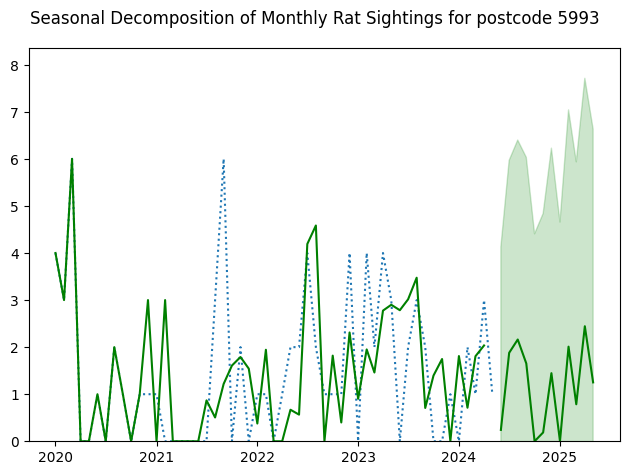

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RMSE: 1.89, MAE: 1.38, R2: -0.39


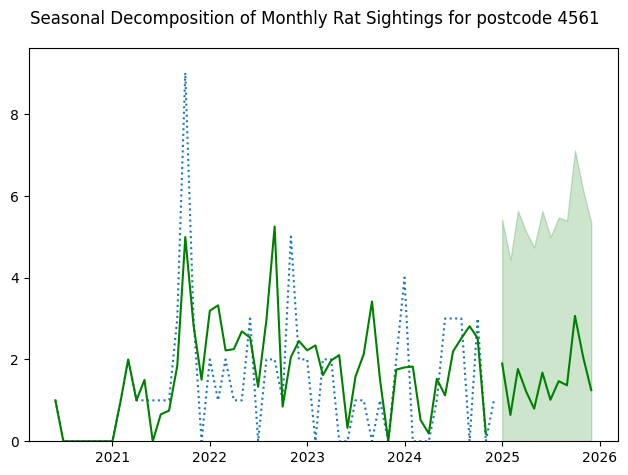

In [4]:
from sklearn.metrics import r2_score, root_mean_squared_error

pc_count = 10

for i in range(pc_count):
    pc = pc_rat_df.sort_values(by='TOTAAL', ascending=False).reset_index().loc[i, 'postcode']
    
    pc_df = rat_df.loc[rat_df['Pc4code'] == pc]

    monthly_pc_df = (
        pc_df.groupby(['year', 'month', 'Aantal ratten'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )

    # Ensure both columns exist
    for col in ['EEN_OF_MEER', 'MEER_DAN_VIJF']:
        if col not in monthly_pc_df.columns:
            monthly_pc_df[col] = 0

    monthly_pc_df['TOTAAL'] = monthly_pc_df['EEN_OF_MEER'] + monthly_pc_df['MEER_DAN_VIJF']

    # Create a 'date' column from year and month
    monthly_pc_df['date'] = pd.to_datetime(monthly_pc_df[['year', 'month']].assign(day=1))

    # Find the date range of sightings in this pc
    date_range = pd.date_range(
        start=monthly_pc_df['date'].min(),
        end=monthly_pc_df['date'].max(),
        freq='MS'
    )

    # Fill in missing months with 0
    monthly_pc_df = monthly_pc_df.set_index('date').reindex(date_range).fillna(0)

    # Sort dataframe and get timeseries
    monthly_pc_df = monthly_pc_df.sort_index()
    ts = monthly_pc_df['TOTAAL']

    # Decompose (assume monthly frequency)
    result = seasonal_decompose(ts, model='additive')

    # Train SARIMAX model to predict future
    model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
    model_results = model.fit()

    # Get fitted values
    fitted = model_results.fittedvalues.clip(lower=0)
    fitted = fitted.shift(-1)

    # Get forecast (future)
    forecast = model_results.get_forecast(steps=12)
    forecast_values = forecast.predicted_mean.clip(lower=0)
    conf_int = forecast.conf_int()

    # Concatenate fitted and forecast
    full_pred = pd.concat([fitted, forecast_values])

    # Only compare where both actual and predicted values are available (not NaN)
    mask = (ts.notna()) & (fitted.notna()) 
    actual = ts[mask] 
    predicted = model_results.fittedvalues[mask]

    # Calculate RMSE, MAE, and R2 score
    rmse = root_mean_squared_error(actual, predicted)
    mae = np.mean(np.abs(actual - predicted))
    r2 = r2_score(actual, predicted)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

    # Plot decomposition
    # Plot the decomposition components in the subplot axes
    plt.suptitle(f'Seasonal Decomposition of Monthly Rat Sightings for postcode {pc}')
    plt.plot(ts.index, ts.values, linestyle=':', label='Original')
    #plt.plot(ts.index, result.trend + result.seasonal, label='Trend + Seasonal')
    plt.plot(full_pred.index, full_pred.values, label='SARIMAX Fitted + Forecast', color='green')
    plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2, label='95% CI')
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()